## Exploratory Data Analysis of Global Netflix Titles: Trends, Genres, and Regional Insights

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in DataFrame

#### Loading Dataset

In [201]:
# dataset = https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download
df0 = pd.read_csv('netflix_titles.csv')
df0.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [202]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data Cleaning

In [203]:
# Missing values
df0.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [204]:
# Convert date_added to datetime
## Remove leading/trailing spaces
df0['date_added'] = df0['date_added'].str.strip()

## Convert to datetime safely
df0['date_added'] = pd.to_datetime(df0['date_added'], errors='coerce')


In [205]:
# Fill missing values in country with 'Unknown'
df0['country'] = df0['country'].fillna('Unknown')

In [206]:
# Drop Lingering Missing Values
df0.dropna(subset=['date_added'], inplace=True)
df0.dropna(subset=['rating'], inplace=True)
df0.dropna(subset=['duration'], inplace=True)
df0.dropna(subset=['director'], inplace=True)
df0.dropna(subset=['cast'], inplace=True)


#### Univariate Analysis

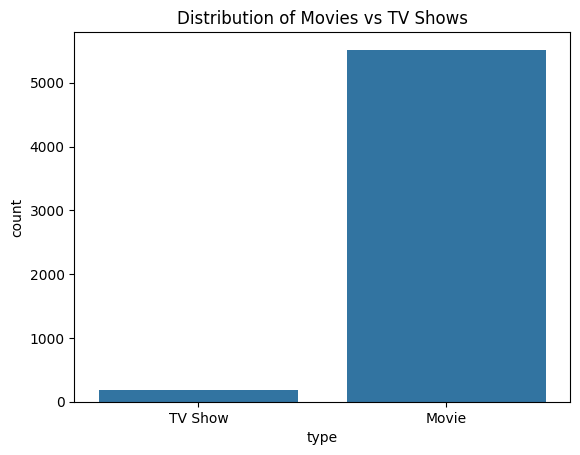

FileNotFoundError: [Errno 2] No such file or directory: '../images/movies_vs_tvshows.png'

<Figure size 640x480 with 0 Axes>

In [207]:
# Movies vs TV Shows distribution
sns.countplot(data=df0, x="type")
plt.title("Distribution of Movies vs TV Shows")
plt.show()
plt.savefig("../images/movies_vs_tvshows.png")

In [ ]:
df0["type"].value_counts(normalize=True)*100

type
Movie      96.875
TV Show     3.125
Name: proportion, dtype: float64

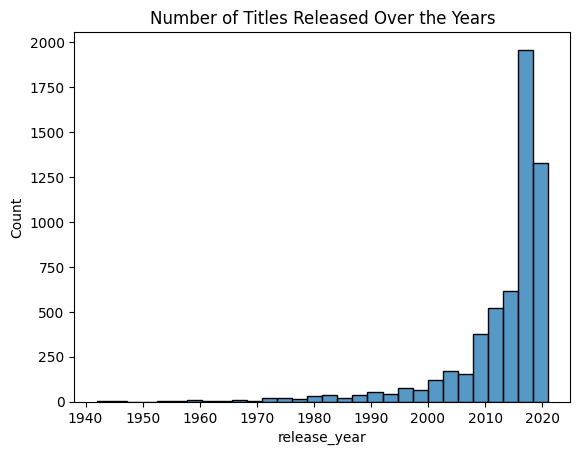

<Figure size 640x480 with 0 Axes>

In [ ]:
# Distribution of Release Years
sns.histplot(df0['release_year'], bins=30, kde=False)
plt.title("Number of Titles Released Over the Years")
plt.show()
plt.savefig("../images/releases_over_time.png")

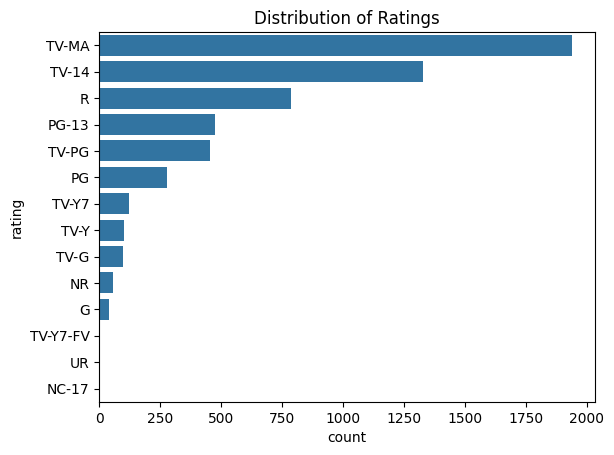

In [ ]:
# Ratings distribution
sns.countplot(y="rating", data=df0, order=df0['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

#### Bivariate Analysis

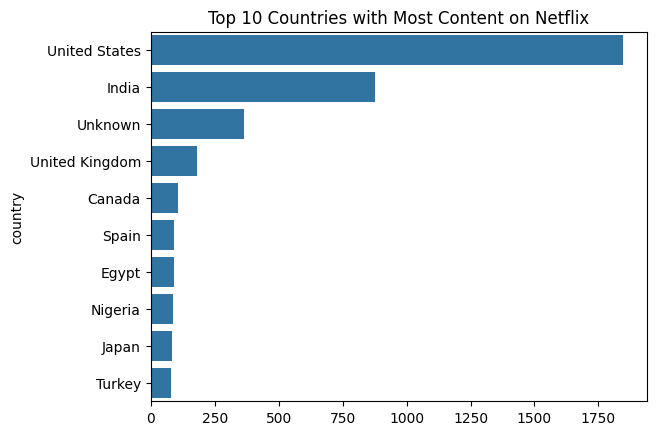

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top 10 countries producing content
top_countries = df0['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()
plt.savefig("../images/top_countries.png")

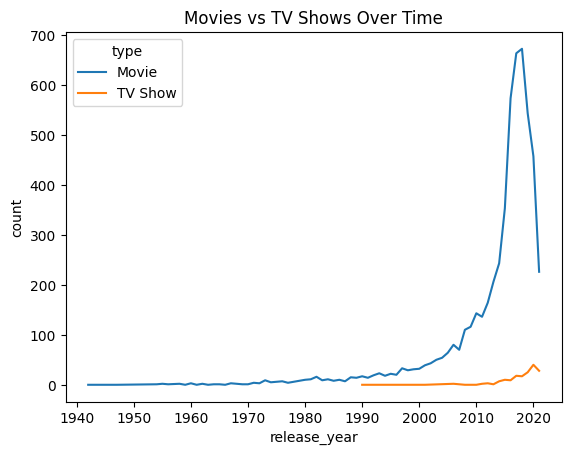

In [ ]:
# Movies vs TV Shows over time
content_trend = df0.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(data=content_trend, x="release_year", y="count", hue="type")
plt.title("Movies vs TV Shows Over Time")
plt.show()

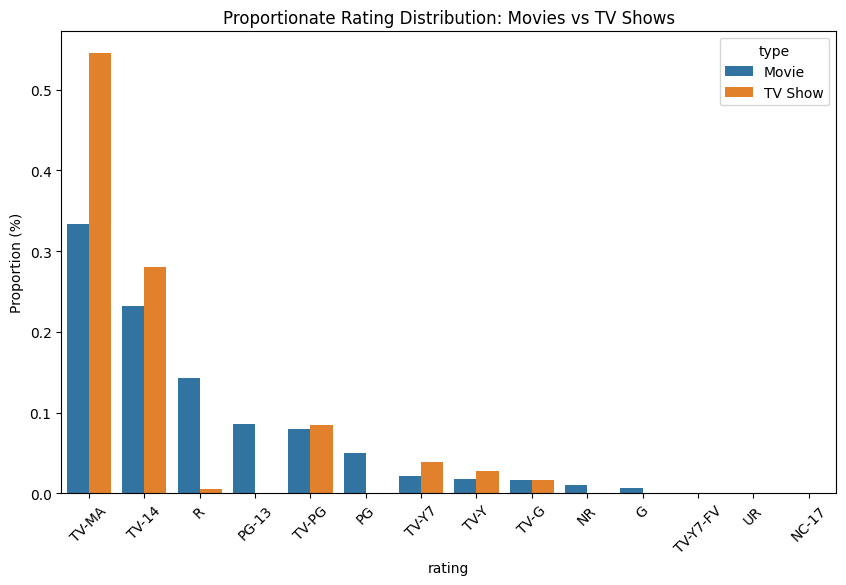

<Figure size 640x480 with 0 Axes>

In [ ]:
# Movies vs TV Shows Ratings

rating_dist = (
    df0.groupby("type")["rating"]
      .value_counts(normalize=True)   # proportions
      .rename("proportion")
      .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=rating_dist, x="rating", y="proportion", hue="type")

plt.title("Proportionate Rating Distribution: Movies vs TV Shows")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("../images/movies_vs_tvshows_ratings.png")

#### Genre Analysis

In [ ]:
! pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\cysd1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from wordcloud import WordCloud as wc

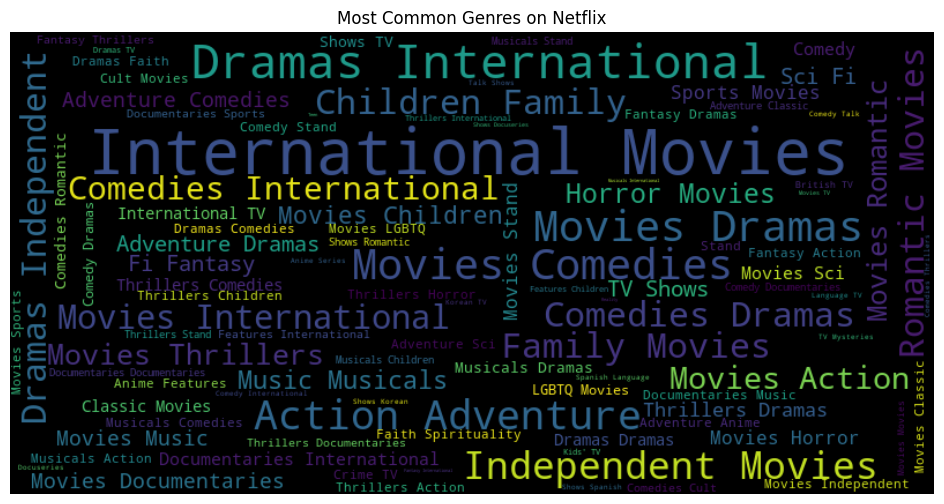

<Figure size 640x480 with 0 Axes>

In [ ]:
all_genres = " ".join(df0['listed_in'].dropna().astype(str))
wordcloud = wc(width=800, height=400, background_color="black").generate(all_genres)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Genres on Netflix")
plt.show()
plt.savefig("../images/genres_wordcloud.png")

#### Duration Analysis

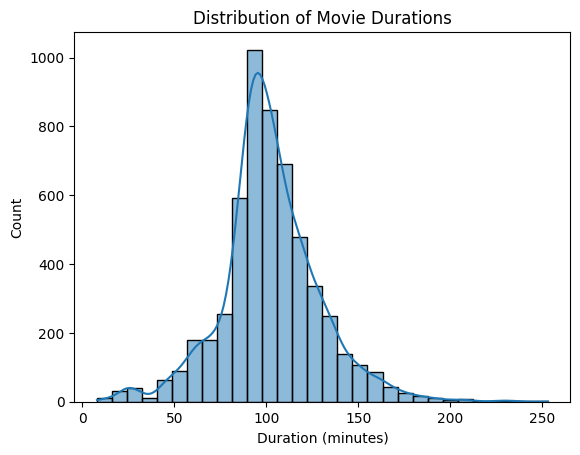

<Figure size 640x480 with 0 Axes>

In [ ]:
# Movie durations
movie_df = df0[df0['type'] == "Movie"].copy()
movie_df['duration'] = movie_df['duration'].str.replace(" min", "").astype(float)

sns.histplot(movie_df['duration'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()
plt.savefig("../images/movie_durations.png")

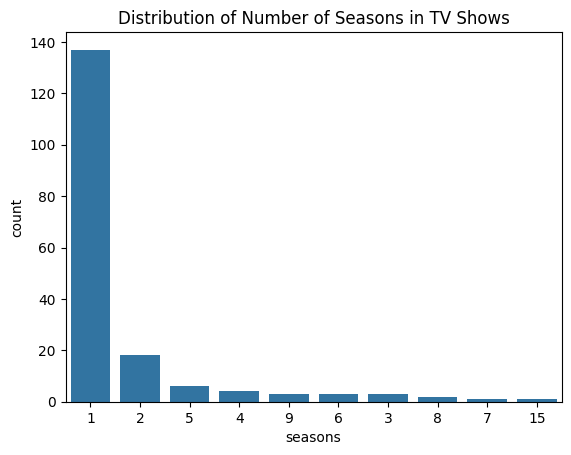

<Figure size 640x480 with 0 Axes>

In [ ]:
# TV Show seasons
tv_df = df0[df0['type'] == "TV Show"].copy()
tv_df['seasons'] = tv_df['duration'].str.replace(" Season", "").str.replace("s", "").astype(int)

sns.countplot(x="seasons", data=tv_df, order=tv_df['seasons'].value_counts().index)
plt.title("Distribution of Number of Seasons in TV Shows")
plt.show()
plt.savefig("../images/tvshow_seasons.png")

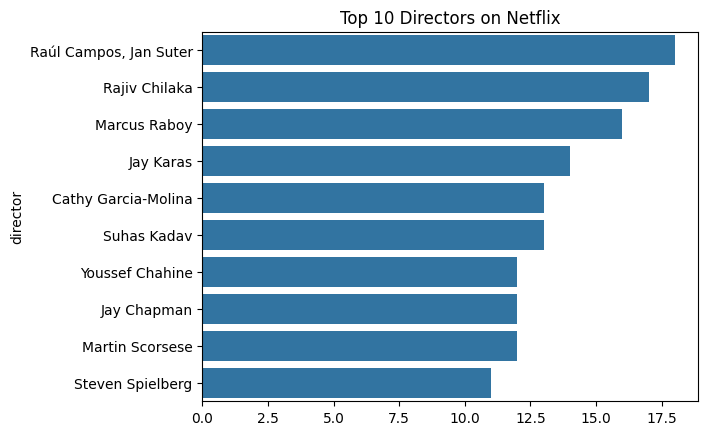

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top 10 directors
top_directors = df0['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors on Netflix")
plt.show()
plt.savefig("../images/top_directors.png")

In [ ]:
df0['director'].value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Suhas Kadav               13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: count, dtype: int64

C:\Users\cysd1\AppData\Local\Temp\ipykernel_12616\905670324.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="viridis")


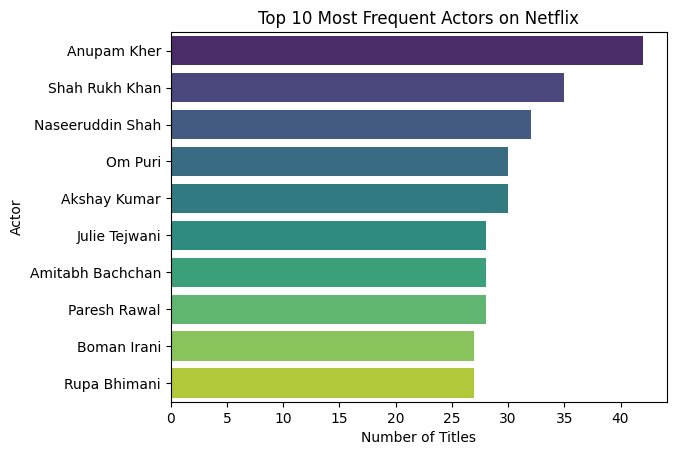

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Julie Tejwani       28
Amitabh Bachchan    28
Paresh Rawal        28
Boman Irani         27
Rupa Bhimani        27
Name: count, dtype: int64

In [ ]:
# Top 10 Actors

# Drop missing cast values
actors_df = df0.dropna(subset=['cast'])

# Split comma-separated actors into separate rows
actors_series = actors_df['cast'].str.split(',').explode().str.strip()

# Count actor frequencies
top_actors = actors_series.value_counts().head(10)

# Plot
sns.barplot(x=top_actors.values, y=top_actors.index, palette="viridis")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

top_actors


#### Key Insights

1. Movies vs TV Shows:

- The number of movies produced is significantly higher than TV Shows. This can be especially verified considering the production of movies has been going on for a far longer time as compared to TV shows.
- TV Shows are highly concentrated in mature ratings — over 50% are TV-MA and nearly 30% TV-14, reflecting Netflix’s focus on adult and teen-oriented series.
- Movies have a more balanced spread across ratings, including R, PG-13, PG, and G, suggesting they are designed to reach a wider audience base.
- Family/Kids content (PG, G, TV-Y, TV-Y7) is primarily delivered through Movies, while TV Shows contribute very little here.

Overall, Netflix positions TV Shows for mature/teen audiences, while Movies serve a broad spectrum — from kids to adults.